# Figure 4.1

In [1]:
# states are cells of 4x4 grid
states = [(x, y) for x in range(4) for y in range(4)]

# actions
actions = {'north': (0, -1), 'south': (0, 1), 'east': (1, 0), 'west': (-1, 0)}

In [2]:
def state_reward(state, action):
    x, y = state
    dx, dy = action
    if (x, y) in [(0, 0), (3, 3)]:
        return (x, y), 0
    # new state
    x1, y1 = x + dx, y + dy
    if x1 in (-1, 4) or y1 in (-1, 4):
        return (x, y), -1
    else:
        return (x1, y1), -1

In [3]:
def update_value_out(values, state, policy, discount=0.9):
    if state in [(0, 0), (3, 3)]:
        return 0
    _value = 0
    for action in actions.values():
        next_state, reward = state_reward(state, action)
        _value += policy * (reward + discount * values[next_state])
    return _value
    

In [4]:
def fill_table(values):
    fig, ax = plt.subplots()
    tb = Table(ax, bbox=[0, 0, 1, 1])
    for (x, y), val in values.items():
        tb.add_cell(x, y, 1/4, 1/4, text=round(val, 1), 
                    loc='center', facecolor='white')

    ax.add_table(tb)
    ax.set_axis_off()

Two-array version of iterative policy evaluation

In [5]:
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.table import Table

def eval_policy(iters):
    values = dict((state, 0) for state in states)
    values[(0, 0)] = 0
    values[(3, 3)] = 0
    policy = 0.25
    for i in range(iters):
        old_values = deepcopy(values)
        for state in states:
            prev_value = values[state]
            values[state] = update_value_out(old_values, state, policy, discount=1)

    fill_table(values)
    # plt.savefig(f'figs/fig4_1_k_{iters}.svg', format='svg')

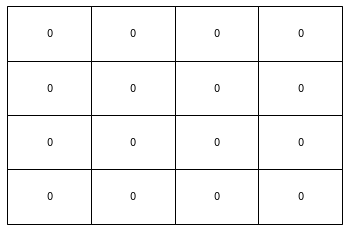

In [6]:
eval_policy(0)

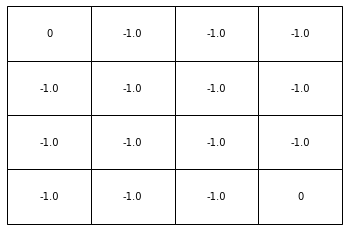

In [7]:
eval_policy(1)

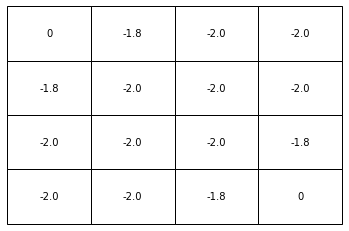

In [8]:
eval_policy(2)

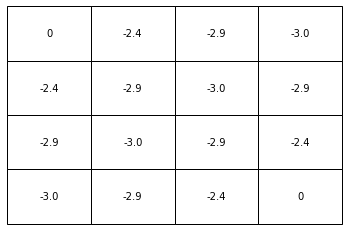

In [9]:
eval_policy(3)

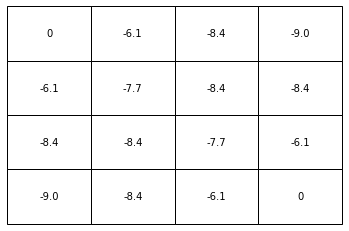

In [10]:
eval_policy(10)

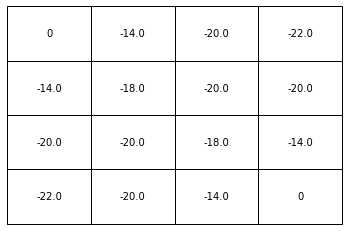

In [11]:
eval_policy(1000)